<a href="https://colab.research.google.com/github/AymanBerri/ml-penguins-project/blob/main/penguins_decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### 1) Setup & Data Loading

In [1]:
# importing api key with username (kaggle.json)
from google.colab import files
files.upload()  # Select your kaggle.json file here


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"aymanberri","key":"a86bc66ed82b50e8059e361af99e12f4"}'}

In [2]:
# Move it to the proper folder and set permissions
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
# Test Kaggle CLI
!kaggle datasets list


ref                                                            title                                                     size  lastUpdated                 downloadCount  voteCount  usabilityRating  
-------------------------------------------------------------  --------------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
wardabilal/spotify-global-music-dataset-20092025               Spotify Global Music Dataset (2009–2025)               1289021  2025-11-11 09:43:05.933000           6132        126  1.0              
sadiajavedd/students-academic-performance-dataset              Students_Academic_Performance_Dataset                     8907  2025-10-23 04:16:35.563000          11617        291  1.0              
kundanbedmutha/instagram-analytics-dataset                     Instagram Analytics Dataset                            1090208  2025-11-19 09:28:48.650000           1343         33  1.0              
sonal

In [ ]:
# After setting the token, install Kaggle and download dataset
!pip install kaggle

In [3]:
# Download the palmer penguin dataset
!kaggle datasets download -d samybaladram/palmers-penguin-dataset-extended


Dataset URL: https://www.kaggle.com/datasets/samybaladram/palmers-penguin-dataset-extended
License(s): Attribution 4.0 International (CC BY 4.0)
  0% 0.00/41.5k [00:00<?, ?B/s]
100% 41.5k/41.5k [00:00<00:00, 149MB/s]


In [4]:
# Unzip
!unzip -o palmers-penguin-dataset-extended.zip


Archive:  palmers-penguin-dataset-extended.zip
  inflating: palmerpenguins_extended.csv  
  inflating: palmerpenguins_original.csv  


In [5]:
# Load CSV into pandas
import pandas as pd

penguins = pd.read_csv("palmerpenguins_original.csv")
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


**Q1** (check): How many rows and columns does the dataset have? Which columns are numeric vs categorical?

In [6]:
# Number of rows and columns
print("Rows, Columns:", penguins.shape)

print('_' *30)

# Column types
print(penguins.dtypes)

Rows, Columns: (344, 8)
______________________________
species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
year                   int64
dtype: object


#### 2) Basic EDA (Exploratory Data Analysis)

In [7]:
# Quick look
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


_Categorical columns need encoding before feeding into machine learning models_





.

In [8]:
# Summary statistics
penguins.describe()


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,342.000000,342.000000,342.000000,342.000000,344.000000
mean,43.921930,17.151170,200.915205,4201.754386,2008.029070
std,5.459584,1.974793,14.061714,801.954536,0.818356
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.225000,15.600000,190.000000,3550.000000,2007.000000
50%,44.450000,17.300000,197.000000,4050.000000,2008.000000
75%,48.500000,18.700000,213.000000,4750.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


**Q2**: Which columns contain missing values? What strategy will you use to handle them?

In [9]:
# first i start by counting missing values per column
missing_values = penguins.isnull().sum()
print(missing_values[missing_values > 0])

bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64


For handling the missing values, i chose Imputation (i commented it out, because later i drop them instead. Uncommenting this part will follow the imputation path instead :D). This method works well for small datasets.

In [ ]:
# # Fill numeric columns with median
# numeric_cols = penguins.select_dtypes(include=['float64', 'int64']).columns
# penguins[numeric_cols] = penguins[numeric_cols].fillna(penguins[numeric_cols].median())

# # Fill categorical columns with mode
# categorical_cols = penguins.select_dtypes(include=['object']).columns
# for col in categorical_cols:
#     penguins[col] = penguins[col].fillna(penguins[col].mode()[0])


**Q3**: Is the dataset balanced across the three species?

In [10]:
#  count num of sample per species
species_counts = penguins['species'].value_counts()
print(species_counts)


species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64


  as we can see, we have an imbalanced dataset, which may affect model training.

#### 3) Data Cleaning & Encoding

We’ll keep only rows with complete values for simplicity.

In [11]:
penguins = penguins.dropna()

In [12]:
# confirm no missing values exist
print(penguins.isnull().sum())


species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
year                 0
dtype: int64


**Q4**: Why don’t we need to scale features for Decision Trees?

> Scaling matters for models sensitive to magnitude (k-NN, SVM, neural networks).

> Decision Trees, Random Forests, and other tree-based models are scale-invariant.



#### 4) Train/Test Split

In [13]:
# Features (all columns except target), this is what the model will see, inputs to the model.
X = penguins.drop('species', axis=1)

# Target, this is what the model will predict.
y = penguins['species']


now we split into:

*   80% train
*   20% test
*   shuffle data



All categorical features must be converted to numeric before feeding into scikit-learn models.

In [14]:
from sklearn.preprocessing import LabelEncoder

# 1️⃣ Encode categorical features (X)
# 'sex' and 'island' are categorical -> convert to numeric via one-hot encoding
# drop_first=True avoids dummy variable trap
X_encoded = pd.get_dummies(X, drop_first=True)
# Example conversion:
# 'sex' -> 'sex_Male' (0/1)
# 'island' -> 'island_Dream', 'island_Torgersen' (0/1)
# Remaining numeric columns (bill_length_mm, etc.) are unchanged

# 2️⃣ Encode target (y)
le = LabelEncoder()
y_encoded = le.fit_transform(y)
# 'Adelie' -> 0
# 'Chinstrap' -> 1
# 'Gentoo' -> 2

In [15]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y_encoded,
    test_size=0.2,   # 20% test set
    shuffle=True,    # shuffle the data
    random_state=42,  # for reproducibility
    stratify=y_encoded   # <--- this ensures class proportions are preserved

)


# Check shapes
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (266, 8)
X_test shape: (67, 8)
y_train shape: (266,)
y_test shape: (67,)


**Q5**: Why do we use stratify=y in this split?

`stratify=y` ensures train and test keep the same class proportions as the original dataset.

Example: Original: Adelie 50%, Gentoo 30%, Chinstrap 20% →

>    Train (80% of data): ~50% Adelie, 30% Gentoo, 20% Chinstrap

>    Test (20% of data): ~50% Adelie, 30% Gentoo, 20% Chinstrap

This prevents class imbalance in splits.

#### 5) Baseline Decision Tree

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Initialize the model
dt = DecisionTreeClassifier(random_state=42)

# Fit on training data
dt.fit(X_train, y_train)

# Predict on test set
y_pred = dt.predict(X_test)

# Evaluate
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[26  3  0]
 [ 0 14  0]
 [ 2  0 22]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.90      0.91        29
           1       0.82      1.00      0.90        14
           2       1.00      0.92      0.96        24

    accuracy                           0.93        67
   macro avg       0.92      0.94      0.92        67
weighted avg       0.93      0.93      0.93        67



In [ ]:
# Metrics explanation:
# -----------------------------------------------------------------------------
# Metric         | Meaning (easy)
# -------------- | -----------------------------------------------
# Accuracy       | Overall % of correct predictions
# Precision      | Of all predicted as class X, how many were correct
# Recall         | Of all actual class X, how many did the model find
# F1-score       | Balance between precision and recall
# Support        | Number of true samples for each class
# Macro Avg      | Average of metrics across classes, all classes equal weight
# Weighted Avg   | Average of metrics weighted by number of samples per class
# -----------------------------------------------------------------------------


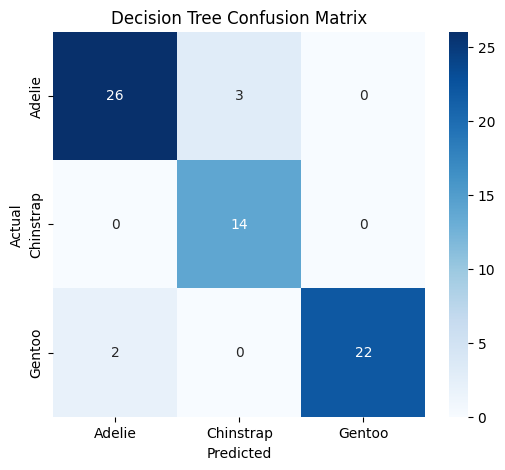

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot heatmap
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Decision Tree Confusion Matrix')
plt.show()


**Q6**: Which classes are the most/least confounded? What might cause that?



Most confounded(confused): Adelie (3 misclassified as Chinstrap)

Next most coufounded: Gentoo (2 misclassified as adelie)

Least confounded: Chinstrap (perfectly classified)

Cause: Overlapping features between species and natural variation in measurements.

#### 6) Visualize the Tree

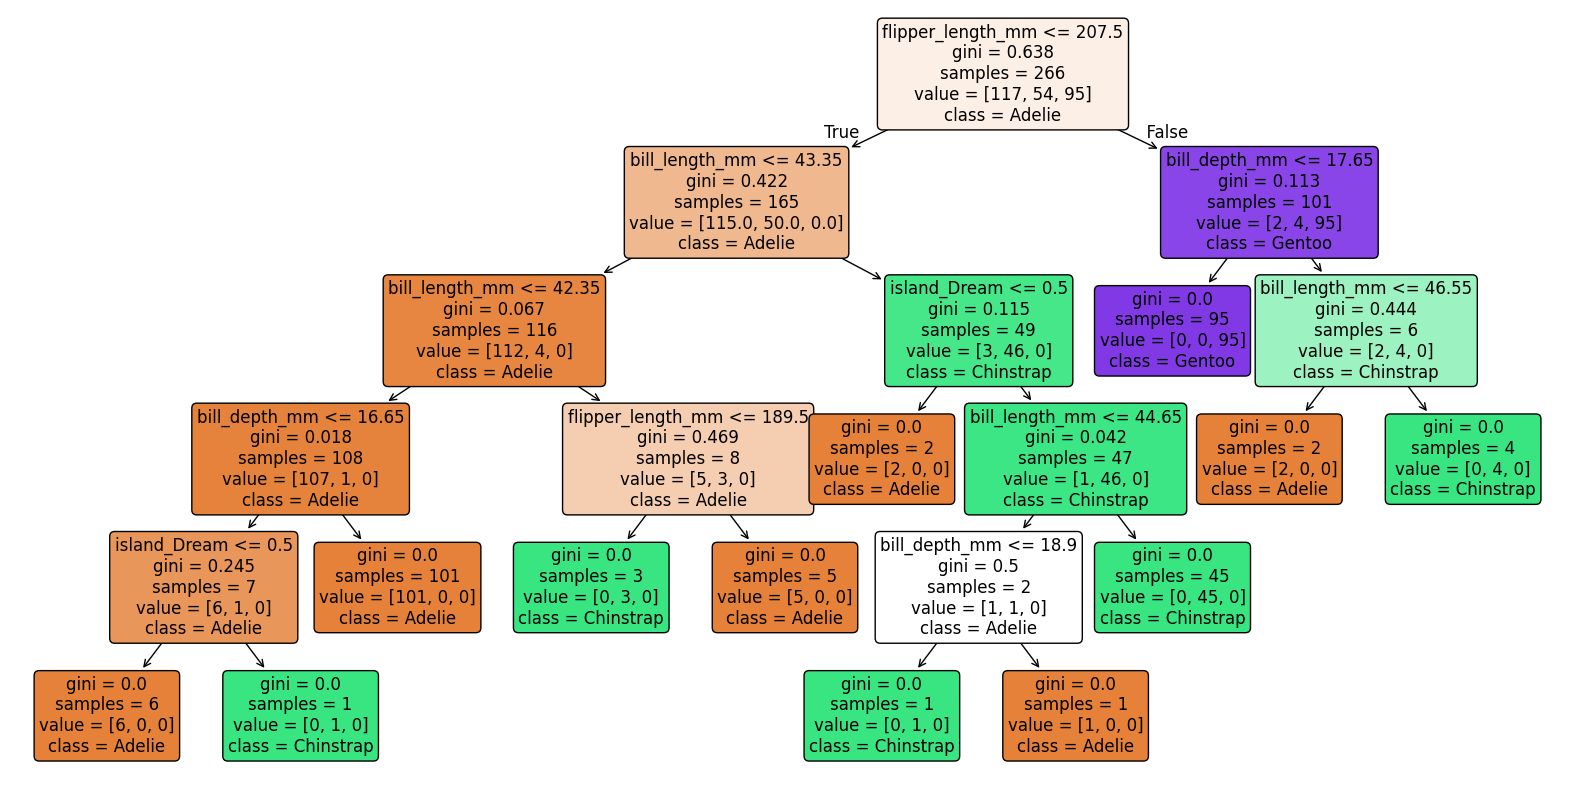

In [18]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))  # Make it big so you can see details
plot_tree(
    dt,
    feature_names=X_encoded.columns,  # feature names
    class_names=le.classes_,          # target names
    filled=True,                      # colors nodes by class
    rounded=True,                     # rounded boxes
    fontsize=12
)
plt.show()


**Q7**: What is the root split (feature and threshold)? Why do you think the algorithm chose it?

The first question the tree asks is: “Is the penguin’s flipper length ≤ 206.5 mm?”

Flipper length is a strong indicator of species:

Gentoo penguins generally have longer flippers than Adelie or Chinstrap.
So splitting at 206.5 mm quickly separates most Gentoos from the others.

______
Decision trees use metrics like Gini impurity or entropy to measure “purity”:
*   A pure node contains mostly one class.



#### 7) Decision Boundaries (2D View)
* Pick two features (e.g., bill_length_mm vs bill_depth_mm) and visualize the decision surface.

In [ ]:
# picking two features for 2D visualization:
features = ['bill_length_mm', 'bill_depth_mm']
X_2d = X_encoded[features].values

# Target
y_2d = y_encoded



In [ ]:
# Train a new Decision Tree on just these two features
dt_2d = DecisionTreeClassifier(random_state=42)
dt_2d.fit(X_2d, y_2d)


DecisionTreeClassifier(random_state=42)

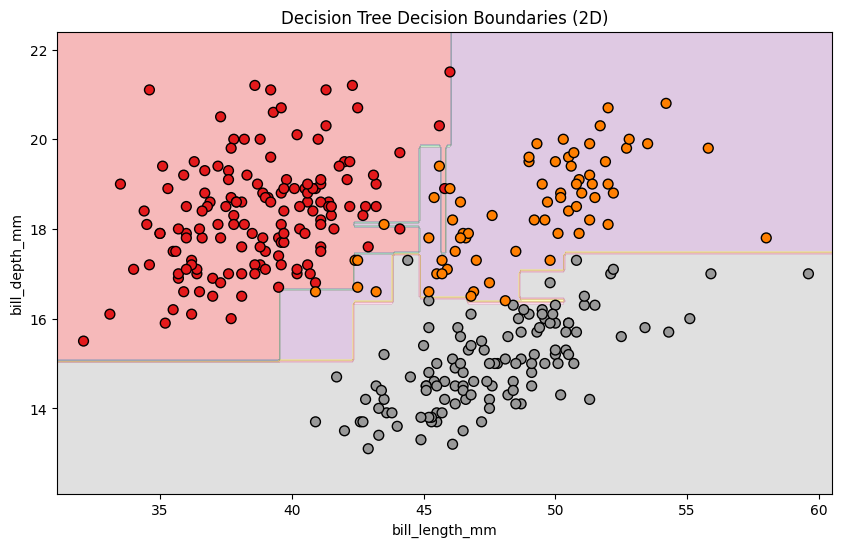

In [ ]:
# plotting the boundaries

import numpy as np
import matplotlib.pyplot as plt

# Create mesh grid
x_min, x_max = X_2d[:, 0].min() - 1, X_2d[:, 0].max() + 1
y_min, y_max = X_2d[:, 1].min() - 1, X_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predict for each point in the grid
Z = dt_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision surface
plt.figure(figsize=(10,6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Set1)
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y_2d, s=50, cmap=plt.cm.Set1, edgecolor='k')
plt.xlabel('bill_length_mm')
plt.ylabel('bill_depth_mm')
plt.title('Decision Tree Decision Boundaries (2D)')
plt.show()


**Q8**: Do the boundaries look axis-aligned? Why is that a natural property of Decision Trees?

Yes, Vertical/horizontal lines are a natural property of trees because each decision compares a single feature to a threshold.

#### 8) Hyperparameter Tuning with GridSearchCV



In [ ]:
# import
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier


In [ ]:
param_grid = {
    'max_depth': [2, 3, 4, 5, None],           # How many levels/questions the tree can ask (None = no limit)
    'min_samples_split': [2, 5, 10],           # Min samples needed to split a node (smaller = more splits)
    'min_samples_leaf': [1, 2, 4],             # Min samples required at a leaf (smaller = smaller final groups)
    'criterion': ['gini', 'entropy']           # How the tree chooses the best split (measure of purity)
}


In [ ]:
# SETUP GridSearchCV
# Initialize a basic Decision Tree
dt = DecisionTreeClassifier(random_state=42)

# GridSearchCV setup
grid_search = GridSearchCV(
    estimator=dt,
    param_grid=param_grid,
    cv=5,                # 5-fold cross-validation
    scoring='accuracy',  # metric to optimize
    n_jobs=-1            # use all cores
)


In [ ]:
# fit the GridSearch
grid_search.fit(X_train, y_train)

# Best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Best accuracy score from CV
print("Best CV Accuracy:", grid_search.best_score_)


Best Hyperparameters: {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best CV Accuracy: 0.9735849056603774


In [ ]:
# evaluate
# Get the best model
best_dt = grid_search.best_estimator_

# Predict on test set
y_pred_best = best_dt.predict(X_test)

# Evaluate
from sklearn.metrics import classification_report, confusion_matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best))
print("\nClassification Report:\n", classification_report(y_test, y_pred_best))


Confusion Matrix:
 [[28  1  0]
 [ 0 14  0]
 [ 2  0 22]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95        29
           1       0.93      1.00      0.97        14
           2       1.00      0.92      0.96        24

    accuracy                           0.96        67
   macro avg       0.96      0.96      0.96        67
weighted avg       0.96      0.96      0.96        67



**Q9**: Which hyperparameters changed compared to the baseline? How did test accuracy change?

>After hyperparameter tuning, several Decision Tree parameters changed (e.g., max_depth, min_samples_split, min_samples_leaf, criterion).
Compared to the baseline model, the tuned model improved test accuracy from 0.93 → 0.96, mainly by reducing misclassifications in the Adelie class.



**Q10**: If CV accuracy is much higher than test accuracy, what could be happening?

In [ ]:
grid_search.best_score_


np.float64(0.9735849056603774)

In our case, CV accuracy (97.4%) is slightly higher than test accuracy (96%), which is normal and shows minor differences due to the test set being unseen. There is no significant overfitting. In general, if CV accuracy is much higher than test accuracy, it indicates that the model overfits the training folds or the test set has a different distribution.

#### 9) Model Interpretation

  _Decision Trees can tell you which features are most important in making predictions._

In [ ]:
# Feature importance
import pandas as pd

feature_importances = pd.DataFrame({
    'feature': X_encoded.columns,
    'importance': best_dt.feature_importances_
}).sort_values(by='importance', ascending=False)

feature_importances


,feature,importance
2,flipper_length_mm,0.530180
0,bill_length_mm,0.355176
1,bill_depth_mm,0.092629
5,island_Dream,0.022016
3,body_mass_g,0.000000
4,year,0.000000
6,island_Torgersen,0.000000
7,sex_male,0.000000


**Q11**: Which feature is most important? Is that consistent with your EDA intuition?

>Most important feature: flipper_length_mm

Consistency with EDA:
- During EDA, we might have noticed that flipper length separates species clearly → consistent with the model.
____


In [ ]:
sample = X_test.iloc[0:1]  # keeps it as a DataFrame
prob = best_dt.predict_proba(sample)
pred_class = best_dt.predict(sample)

print("Predicted class:", le.inverse_transform(pred_class))
print("Class probabilities:", prob)


Predicted class: ['Gentoo']
Class probabilities: [[0. 0. 1.]]


**Q12**: For the inspected sample, does the class probability look confident? Why/why not?

>For the inspected sample, the predicted class is Gentoo, and the class probabilities are [0.0, 0.0, 1.0]. This shows the model is very confident, because the sample falls into a leaf node that contains only Gentoo training samples. If the leaf had a mix of species, the probabilities would be more spread out, showing less confidence.

#### 10) Reflection & Reporting

Write a short reflection (5–10 lines):
- Compare Decision Tree vs KNN on this dataset.
-  Where does the tree overfit? How did pruning/tuning impact generalization?
- Which 2D feature pair gave the clearest separation? Why?

1. **Model Comparison**:

The Decision Tree slightly outperformed KNN on this dataset.

Trees handle categorical features naturally and are scale-invariant, whereas KNN depends on distances and requires scaling.

2. **Overfitting & Tuning**:

The baseline tree overfit slightly, especially for the _Adelie_ class, misclassifying a few samples.

Hyperparameter tuning/pruning `(max_depth, min_samples_split, min_samples_leaf)` reduced overfitting and improved generalization, increasing test accuracy from `0.93` → `0.96`.

3. **Feature Separation**:

The 2D feature pair bill_length_mm vs bill_depth_mm gave the clearest separation between species.

These features vary significantly across species, allowing the tree to create clean axis-aligned splits.

4. **Insights**:

Decision Trees provide interpretable rules and feature importance, making it easy to understand how predictions are made.

KNN relies on proximity, which can be less robust when classes overlap slightly.